## Question
### Borough to Borough Stats

In [2]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
extracted_files = glob.glob('..\\Data\\*\\*\\processed\\*.csv')
df = pd.DataFrame()
list_ = []
for fileName in extracted_files:
    short_df = pd.read_csv(fileName)
    list_.append(short_df)
df = pd.concat(list_)
df = df.rename(columns = {'pickup_area':'Pick-Up', 'dropoff_area':'Dropoff'})

In [4]:
len(df)

150774

In [70]:
df = df[df['Pick-Up'] != 'Not Specified']
df = df[df['Dropoff'] != 'Not Specified']
df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,Pick-Up,Dropoff
0,0,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.2,-73.979424,40.744614,1,N,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,2016-01-01,Manhattan,Manhattan
1,1,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.0,-73.947151,40.791046,1,N,...,18.0,0.5,0.5,0.00,0.00,0.3,19.30,2016-01-01,Manhattan,Manhattan
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,14.0,0.5,0.5,3.05,0.00,0.3,18.35,2016-01-01,Manhattan,Manhattan
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,11.0,0.5,0.5,1.50,0.00,0.3,13.80,2016-01-01,Manhattan,Manhattan
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,7.0,0.5,0.5,1.65,0.00,0.3,9.95,2016-01-01,Manhattan,Manhattan
5,5,1,2016-01-01 00:00:07,2016-01-01 00:20:35,2,4.9,-73.953033,40.672115,1,N,...,19.0,0.5,0.5,4.06,0.00,0.3,24.36,2016-01-01,Brooklyn,Manhattan
6,6,1,2016-01-01 00:00:07,2016-01-01 00:09:49,1,1.8,-73.989166,40.726589,1,N,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,2016-01-01,Manhattan,Manhattan
7,7,1,2016-01-01 00:00:09,2016-01-01 00:19:03,3,5.3,-73.997131,40.736961,1,N,...,18.0,0.5,0.5,3.85,0.00,0.3,23.15,2016-01-01,Manhattan,Queens
8,8,1,2016-01-01 00:00:09,2016-01-01 00:07:18,2,1.2,-73.963913,40.712173,1,N,...,7.0,0.5,0.5,0.00,0.00,0.3,8.30,2016-01-01,Brooklyn,Brooklyn
9,9,1,2016-01-01 00:00:14,2016-01-01 00:13:02,1,2.4,-73.995598,40.744240,1,N,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2016-01-01,Manhattan,Manhattan


In [71]:
group_by_series = df['total_amount'].groupby([df['Pick-Up'], df['Dropoff']]).sum()
group_by_df = group_by_series.to_frame()
group_by_df = group_by_df.reset_index()

In [72]:
reshaped = group_by_df.pivot_table('total_amount', 'Pick-Up', 'Dropoff')
reshaped = reshaped.fillna(0.0)
reshaped = reshaped.round(2)

In [73]:
reshaped

Dropoff,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Pick-Up,,,,,
Bronx,4328.69,197.78,2930.96,656.54,0.00
Brooklyn,1184.25,67935.79,40048.17,15083.40,51.30
Manhattan,43725.55,161242.94,1360331.61,213737.80,2033.20
Queens,8138.49,58872.59,175640.55,69512.92,963.15
Staten Island,0.00,46.80,0.00,0.00,11.80


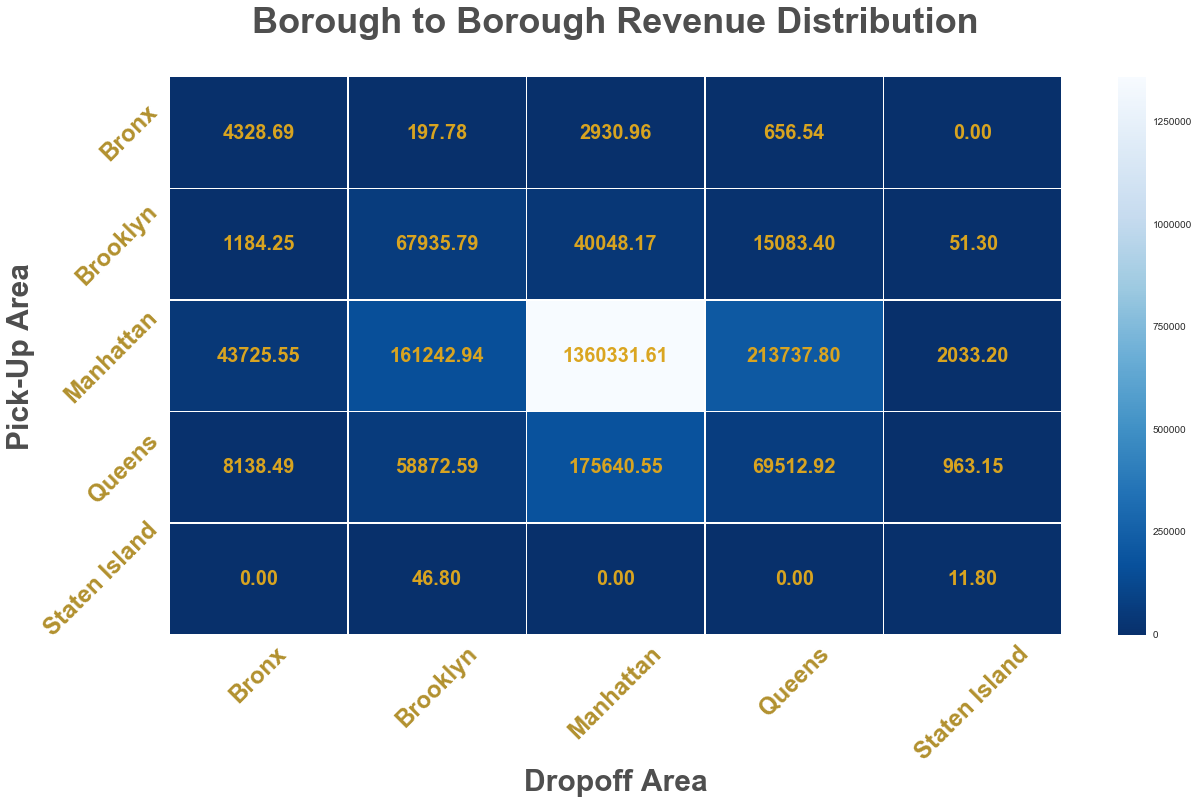

In [74]:
plt.subplots(figsize=(20,10))
sns.set_style('whitegrid')
cost_heatmap = sns.heatmap(reshaped, annot=True,
                           annot_kws={"size": 20, "color":'#DAA520' , 'weight':'bold'},
                           linewidths=.5, fmt='.2f', cmap='Blues_r',
                           cbar=True)

#XYTick
plt.setp(cost_heatmap.get_xticklabels(), rotation=45, fontsize=24, color='#B2912F', fontweight='bold')
plt.setp(cost_heatmap.get_yticklabels(), rotation=45, fontsize=24, color='#B2912F', fontweight='bold')

#title
figure_title = cost_heatmap.set_title('Borough to Borough Revenue Distribution', weight='bold')
figure_title.set_position([.5, 1.07])
cost_heatmap.title.set_fontsize(36)
cost_heatmap.title.set_color('#4D4D4D')

#XYLabels
cost_heatmap.xaxis.get_label().set_fontsize(30)
cost_heatmap.xaxis.set_label_text('Dropoff Area', weight='bold')
cost_heatmap.xaxis.get_label().set_color('#4D4D4D')

cost_heatmap.yaxis.get_label().set_fontsize(30)
cost_heatmap.yaxis.set_label_text('Pick-Up Area', weight='bold')
cost_heatmap.yaxis.get_label().set_color('#4D4D4D')